In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

In [3]:
np.random.seed(20)


tweets_data = pd.read_csv('dataset_final_vader.csv', delimiter=';')
new_tweets_data = pd.read_csv('fix_with_slang.csv', delimiter=';')


2665    1
2600    1
2356    1
Name: label_vader, dtype: int64


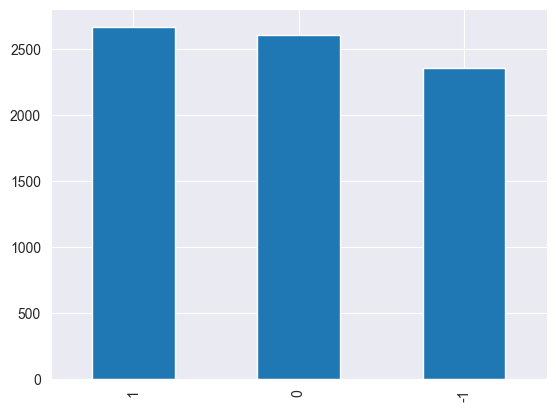

In [4]:
tweets = tweets_data['origin_text_id']
labels = tweets_data['label_vader']

labels_count = labels.value_counts()
labels_count.plot(kind='bar')
print(labels_count.value_counts())

In [7]:
split_bucket =[]
tkr = RegexpTokenizer('[a-zA-Z@]+')
for i, line in enumerate(tweets):
    tweet = line.split()
    tweet = tkr.tokenize(str(tweet))
    split_bucket.append(tweet)

print(split_bucket[-1])

['etle', 'etle', 'tp', 'msh', 'manual', 'ngambil', 'fotonya', 'emang', 'tuolol', 'ada', 'cctv', 'napa', 'g', 'di', 'manfaatkan', 'oiya', 'lupa', 'nanti', 'bisa', 'di', 'edit', 'yak']


In [8]:
split_bucket[-1]

['etle',
 'etle',
 'tp',
 'msh',
 'manual',
 'ngambil',
 'foto',
 'emang',
 'tuolol',
 'ada',
 'cctv',
 'napa',
 'g',
 'di',
 'manfaat',
 'oiya',
 'lupa',
 'nanti',
 'bisa',
 'di',
 'edit',
 'yak']

In [8]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tqdm.auto import tqdm

sentences = [word_tokenize(x) for x in tqdm(tweets)]
sentences[:5]



  0%|          | 0/7621 [00:00<?, ?it/s]

[['kembangkan',
  'etle',
  ',',
  '7',
  'polda',
  'dapat',
  'penghargaan',
  'di',
  'rakernis',
  'fungsi',
  'gakkum'],
 ['sosialisasi', 'etle', 'dan', 'app', 'smart', 'city'],
 ['berita',
  'populer',
  'kumparanoto',
  ',',
  'selasa',
  '1312',
  'detail',
  'vespa',
  'batik',
  'seharga',
  'rp',
  '77',
  'juta',
  ',',
  'cara',
  'kerja',
  'dan',
  'jenis',
  'pelanggaran',
  'tilang',
  'etle',
  'mobile',
  '.'],
 ['mimin',
  'kasih',
  'info',
  'ya',
  'gaes',
  ',',
  'kita',
  'mau',
  'uji',
  'coba',
  'etle',
  'di',
  'wilayah',
  'tangerang',
  'kota',
  'nih',
  '.',
  'yukss',
  'patuhi',
  'peraturan',
  'lalu',
  'lintas',
  ',',
  'biar',
  'ngga',
  'dapet',
  'surat',
  'cinta',
  'dari',
  'mimin'],
 ['personil',
  'lalu',
  'lintas',
  'polres',
  'badung',
  'melaksanakan',
  'teguran',
  'secara',
  'humanis',
  'kepada',
  'masyarakat',
  'yang',
  'tidak',
  'mempergunakan',
  'helm',
  '.',
  '.']]

In [9]:
import os
model =Word2Vec(sentences=sentences, vector_size=128, window=5, min_count=3, workers=4, epochs=1000, sg=0, hs=0 )
os.makedirs("model/w2v/", exist_ok=True)
model.save("model/w2v/etle_dataset_origin_text.model")


In [18]:
load = Word2Vec.load("model/w2v/etle_dataset_origin_text.model")

In [13]:
w2v = load.wv

In [15]:
w2v.index_to_key

['.',
 ',',
 'etle',
 'tilang',
 'di',
 'elektronik',
 'dan',
 'yang',
 'kamera',
 'etilang',
 'lintas',
 'polda',
 'ini',
 'lalu',
 'ada',
 'manual',
 'mobile',
 'pelanggaran',
 'untuk',
 'polres',
 'polisi',
 'sosialisasi',
 'dengan',
 'bisa',
 'kena',
 'yg',
 'akan',
 'lantas',
 '2022',
 'polri',
 'pelanggar',
 'masyarakat',
 'tidak',
 'kendaraan',
 'atau',
 'kota',
 'kapolri',
 'jalan',
 'pengendara',
 'metro',
 'pungli',
 'ke',
 'mulai',
 'traffic',
 'ya',
 'law',
 'itu',
 'ga',
 'enforcement',
 'satlantas',
 'sistem',
 'aplikasi',
 'hari',
 'sudah',
 'kepada',
 'cara',
 'jaya',
 'menggunakan',
 'surat',
 'penindakan',
 'electronic',
 'ditlantas',
 'giat',
 'pada',
 'dari',
 'secara',
 'dalam',
 'juga',
 'plat',
 'lagi',
 'mobil',
 'zebra',
 'operasi',
 'aja',
 'gak',
 'online',
 'tak',
 'kalo',
 'melalui',
 'tapi',
 'hukum',
 'cctv',
 'nomor',
 'tercapture',
 'korlantas',
 'banyak',
 'sim',
 'pak',
 'melaksanakan',
 'oleh',
 'melakukan',
 'smart',
 'lebih',
 '1',
 'penerapan',
 '

In [16]:
w2v.vectors

array([[-0.51987576, -0.11301365,  0.86377126, ..., -0.4791857 ,
         0.5146075 , -1.1546612 ],
       [-0.6688522 , -0.55416536,  1.2798222 , ..., -0.453539  ,
         0.26390088, -1.440308  ],
       [ 0.1358714 , -3.6266193 ,  0.07829557, ...,  1.7402557 ,
        -0.77879614,  0.9131657 ],
       ...,
       [-2.6406634 , -0.05117225, -0.92996335, ..., -2.2555313 ,
        -0.8254951 ,  1.7208917 ],
       [ 0.3294125 , -4.8576927 ,  1.1033006 , ..., -1.40378   ,
        -1.4137754 ,  1.9022019 ],
       [-0.81305736,  0.9110352 ,  0.37552348, ...,  0.46394384,
         1.0125691 , -1.2304474 ]], dtype=float32)

In [17]:
w2v.vector_size

128

In [19]:
w2v.get_vector("ojol")

array([ 2.1157606 , -0.12685345,  1.5248972 , -0.95952207, -2.286263  ,
       -1.5288812 , -0.21539417,  2.4283743 , -2.482218  ,  3.918049  ,
        3.9015622 , -0.54111063,  0.09709703,  1.4287821 ,  2.524994  ,
        0.5084887 ,  1.2018636 ,  0.31482697, -3.8784752 , -0.2934743 ,
        0.42448187, -0.41837513,  0.49797714, -1.5234358 , -0.629219  ,
       -0.01684473,  4.2627497 ,  1.0899798 , -0.03885339, -4.591828  ,
        0.83279026, -0.706956  ,  4.5625935 , -4.8738937 ,  0.9138127 ,
       -1.8241602 ,  1.6703519 ,  0.36238486, -5.431518  , -2.3831906 ,
       -4.517662  ,  3.0880103 ,  2.045776  , -4.2764244 , -2.733722  ,
       -0.39301768,  4.0736184 , -0.67163205, -3.4500792 ,  0.13262872,
       -0.30564135, -2.140066  ,  2.96824   , -0.26480174, -0.13205644,
       -1.2466093 , -0.85349894,  0.6327887 , -0.6710296 ,  1.0454823 ,
       -2.7736437 ,  3.2192435 ,  1.0030837 ,  3.0382364 , -0.931653  ,
        0.8921258 , -0.02530616,  0.27140406, -1.5704445 ,  0.86

## sanity check

In [39]:
w2v.similar_by_word("jokowi", topn=5)

[('smkn', 0.41539373993873596),
 ('p', 0.33039793372154236),
 ('dikorupsi', 0.3286185562610626),
 ('just', 0.32326245307922363),
 ('pahami', 0.3108600974082947)]

In [43]:
from umap import UMAP
import plotly.express as px

SystemError: initialization of _internal failed without raising an exception

# LSTM

In [ ]:
def label_changer(value):
    if value == 1:
        new_value = 2
    elif value == -1:
        new_value = 0
    else:
        new_value = 1
    return new_value

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import gensim.models.keyedvectors as w2vmodel


data_label = pd.read_csv("dataset_final_vader.csv", delimiter=';')
data_tweet_fix = pd.read_csv("fix_with_slang.csv", delimiter=';')
data_label['text_id'] = data_tweet_fix['text_id']
data_label.drop(["origin_text_id", "origin_text_en","text_en"], axis=1)
data_label['label_vader'] = data_label['label_vader'].apply(lambda x : label_changer(x))
# data_label = data_label.sample(frac=1).reset_index(drop=True)


w2v_model = Word2Vec.load("model/w2v/etle_dataset_origin_text.model")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_label['text_id'])
X = tokenizer.texts_to_sequences(data_label['text_id'])

max_len_tweet = 60
X = pad_sequences(X, maxlen=max_len_tweet)
print(X.shape)

vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 128))
for word,i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size,16, input_length=max_len_tweet))
model_lstm.add(LSTM(128, activation='tanh'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation="softmax"))


model_lstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


train_size = int(len(data_label) * 0.8)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = data_label["label_vader"][:train_size], data_label["label_vader"][train_size:]

train_X = np.stack(train_X, axis=0)
train_y = np.stack(train_y, axis=0)
model_lstm.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10, batch_size=128)

scores = model_lstm.evaluate(test_X, test_y, verbose=0)
print(f"Accuracy: {scores[1]*100} %")



In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import gensim.models.keyedvectors as w2vmodel


data_label = pd.read_csv("dataset_final_vader.csv", delimiter=';')
data_tweet_fix = pd.read_csv("fix_with_slang.csv", delimiter=';')
data_label['text_id'] = data_tweet_fix['text_id']
data_label.drop(["origin_text_id", "origin_text_en","text_en"], axis=1)
data_label['label_vader'] = data_label['label_vader'].apply(lambda x : label_changer(x))
# data_label = data_label.sample(frac=1).reset_index(drop=True)


w2v_model = Word2Vec.load("model/w2v/etle_dataset_origin_text.model")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_label['text_id'])
X = tokenizer.texts_to_sequences(data_label['text_id'])

max_len_tweet = 60
X = pad_sequences(X, maxlen=max_len_tweet)
print(X.shape)

vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 128))
for word,i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size,16, input_length=max_len_tweet))
model_lstm.add(LSTM(128, activation='tanh'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation="softmax"))


model_lstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


train_size = int(len(data_label) * 0.8)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = data_label["label_vader"][:train_size], data_label["label_vader"][train_size:]

train_X = np.stack(train_X, axis=0)
train_y = np.stack(train_y, axis=0)
model_lstm.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10, batch_size=128)

scores = model_lstm.evaluate(test_X, test_y, verbose=0)
print(f"Accuracy: {scores[1]*100} %")



(7621, 60)
Epoch 1/10
48/48 [==============================] - 8s 101ms/step - loss: 0.0000e+00 - accuracy: 0.3425 - val_loss: 0.0000e+00 - val_accuracy: 0.3357
Epoch 2/10
48/48 [==============================] - 4s 90ms/step - loss: 0.0000e+00 - accuracy: 0.3425 - val_loss: 0.0000e+00 - val_accuracy: 0.3357
Epoch 3/10
48/48 [==============================] - 5s 97ms/step - loss: 0.0000e+00 - accuracy: 0.3425 - val_loss: 0.0000e+00 - val_accuracy: 0.3357
Epoch 4/10
48/48 [==============================] - 5s 95ms/step - loss: 0.0000e+00 - accuracy: 0.3425 - val_loss: 0.0000e+00 - val_accuracy: 0.3357
Epoch 5/10
48/48 [==============================] - 5s 100ms/step - loss: 0.0000e+00 - accuracy: 0.3425 - val_loss: 0.0000e+00 - val_accuracy: 0.3357
Epoch 6/10
48/48 [==============================] - 4s 88ms/step - loss: 0.0000e+00 - accuracy: 0.3425 - val_loss: 0.0000e+00 - val_accuracy: 0.3357
Epoch 7/10
48/48 [==============================] - 4s 90ms/step - loss: 0.0000e+00 - accurac

In [32]:
y_pred = model_lstm.predict(test_X)
print("Accuracy:", accuracy_score(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))

48/48 [==============================] - 1s 10ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [33]:
model_lstm.save('model_lstm_53.model')

INFO:tensorflow:Assets written to: model_lstm_53.model\assets


INFO:tensorflow:Assets written to: model_lstm_53.model\assets


In [34]:
model_json = model_lstm.to_json()
with open("model_lstm_53.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_lstm.save_weights("model_lstm_53.h5")
print("Saved model to disk")

Saved model to disk
